# Plotting with a Series

Inspecting statistical summaries and tables can reveal much about your data. Another technique
to understand the data at a more intuitive level is to plot it. Plotting leads to the discovery of patterns, trends and insights. Plotting also helps in the debugging of code.

In [71]:
import pandas as pd
import matplotlib
import scipy
# import seaborn as sns
# import matplotlib.pyplot as plt



In [23]:
# Tell pandas to display the plots
%matplotlib inline


url = "https://github.com/mattharrison/datasets/raw/master/data/alta-noaa-1980-2019.csv"

alta_df = pd.read_csv(url)

# Get the Dates
dates = pd.to_datetime(alta_df["DATE"])

# Create the SNOW series

snow = (
        alta_df["SNOW"]
        # Set the dates as index
        .rename(dates)
        )

snow

1980-01-01    2.0
1980-01-02    3.0
1980-01-03    1.0
1980-01-04    0.0
1980-01-05    0.0
             ... 
2019-09-03    0.0
2019-09-04    0.0
2019-09-05    0.0
2019-09-06    0.0
2019-09-07    0.0
Name: SNOW, Length: 14160, dtype: float64

## Plotting Histograms

When you have continuous numeric data, plotting a histogram reveals the distribution of the data.

<AxesSubplot:ylabel='Frequency'>

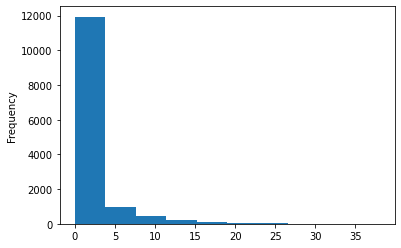

In [65]:
# Plotting a Histogram

snow.plot.hist()

> The data is heavily skewed. Lets drop the zeros and try again.

<AxesSubplot:title={'center':'Snowfall Histogram (in)'}, ylabel='Frequency'>

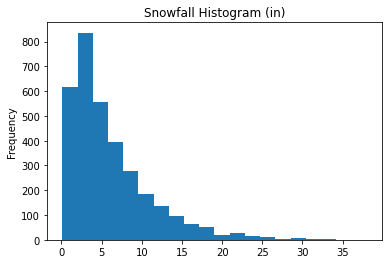

In [66]:
# A Histogram plot with bins and axis labels specified
snow[snow > 0].plot.hist(bins=20, title='Snowfall Histogram (in)')

## Boxplots

Boxplots also help view the distribution of the data.

<AxesSubplot:>

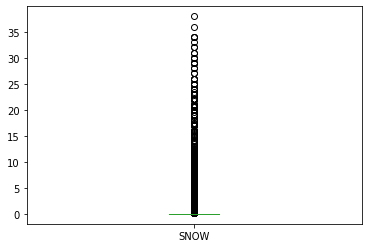

In [67]:

snow.plot.box()

> The plot above does not look boxy because it does not snow all the time

<AxesSubplot:>

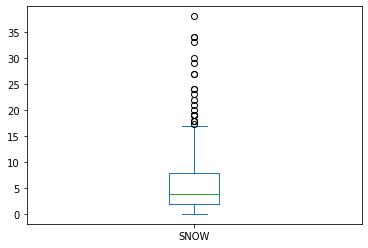

In [68]:
# Snow amounts in Dec
(
    # Get the snow data for Dec (month == 12)
    snow.loc[((snow.index.month == 12) & (snow > 0))]
    .plot.box()
)

## Kernel Density Estimation

The Kernel Density Estimation (KDE) is essentially a smoothed histogram.

<AxesSubplot:ylabel='Density'>

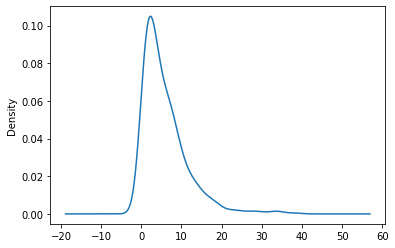

In [69]:
(
    # Get the snow data for Dec (month == 12)
    snow.loc[((snow.index.month == 12) & (snow > 0))]
    .plot.kde()
)

## Line Plots

For numeric time series values a line plot we can plot a line plot.

<AxesSubplot:>

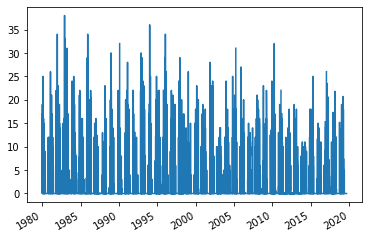

In [70]:
snow.plot.line()

> A line plot in pandas plots the values in the series in the y-axis and the index in the x-axis. This
plot is a little crowded as we are packing daily data for 40 years into the x-axis. We can slice off the
last few years to zoom in or resample to view trends.

<AxesSubplot:>

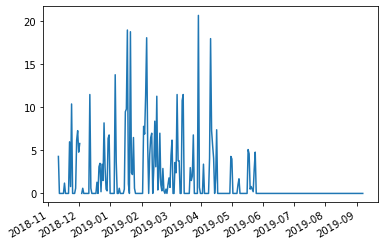

In [31]:
(
    snow
    # Zoom into the last 300 points of the data
    .iloc[-300:]
    # Plot a line-plot
    .plot.line()
)

<AxesSubplot:title={'center':'Average Monthly Rainfall Pattern'}>

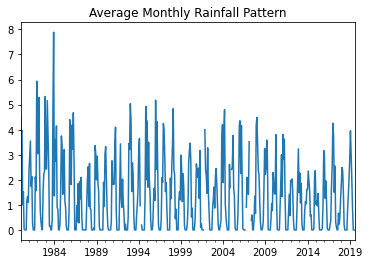

In [34]:
# Aggregated Line Plot

(
    snow
    # Aggregate by Month for the respective Year
    .resample('M')
    # Find the mean of Each Month
    .mean()
    # Now lets plot this
    .plot.line(title="Average Monthly Rainfall Pattern")
)

<AxesSubplot:>

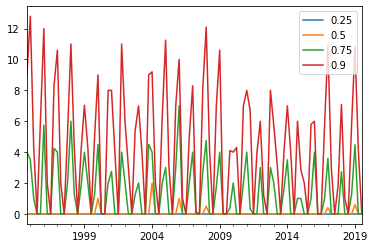

In [39]:
# Line plots with multiple aggregations

(
    snow
    # Resample via quarterly aggregation
    .resample('Q')
    # Find the Quantile of each Quarter
    .quantile([0.25, 0.5, 0.75, 0.9])
    # Now lets unstack the data to produce a dataframe
    .unstack()
    # Zoom into the last 100 quarters
    .iloc[-100:]
    # Now plot the line plot
    .plot.line()
)

## Bar Plots



<AxesSubplot:title={'center':'2018 Monthly Percent of Snowfall'}>

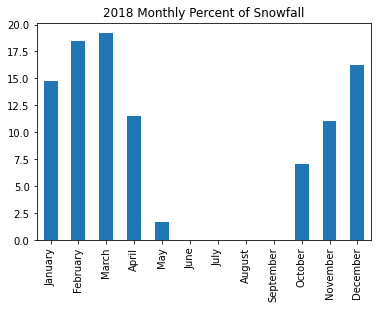

In [44]:
# Percent of SNOW falling each month

(
    snow
    # Filter for 2018-01 to 2018-12
    .loc['2018-01':'2018-12']
    # Aggregate by month
    .resample('M')
    # Find the sum of snow fall in each month
    .sum()
    # Divide by the sum of snowfall for the year 2018
    .div(
        # Select the year and find the sum
        snow.loc['2018-01':'2018-12'].sum()
    )
    # Multiply the result by 100
    .mul(100)
    # Lets rename the index to months -> use lambda to access the intermediate data set
    .rename(lambda idx: idx.month_name())
    # plot this as a bar plot
    .plot.bar(title='2018 Monthly Percent of Snowfall')
)

<AxesSubplot:title={'center':'2018 Monthly Percent of Snowfall'}>

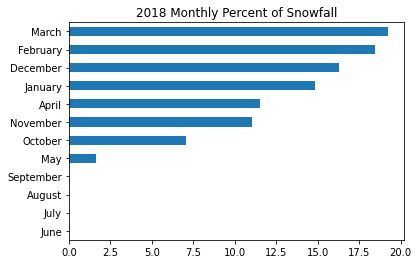

In [48]:
(
    snow
    # Filter for 2018-01 to 2018-12
    .loc['2018-01':'2018-12']
    # Aggregate by month
    .resample('M')
    # Find the sum of snow fall in each month
    .sum()
    # Divide by the sum of snowfall for the year 2018
    .div(
        # Select the year and find the sum
        snow.loc['2018-01':'2018-12'].sum()
    )
    # Multiply the result by 100
    .mul(100)
    # Lets rename the index to months -> use lambda to access the intermediate data set
    .rename(lambda idx: idx.month_name())
    # Sort the values in Descending order
    .sort_values()
    # plot this as a bar plot
    .plot.barh(title='2018 Monthly Percent of Snowfall')
)

C:\Users\INNO\AppData\Local\Temp\ipykernel_54368\1736546619.py:3: DtypeWarning: Columns (68,70,71,72,73,74,76,79) have mixed types. Specify dtype option on import or set low_memory=False.
  auto_df = pd.read_csv(url)


<AxesSubplot:>

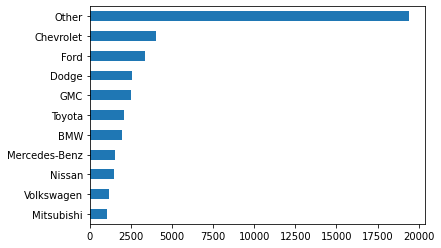

In [58]:
url = 'https://github.com/mattharrison/datasets/raw/master/data/vehicles.csv.zip'

auto_df = pd.read_csv(url)


make = auto_df['make']

# Get the top 10 makes in the dataset
top_10 = make.value_counts().index[:10]

(
    make
    # Check whether record is in the top 10 makes. For False, use Other
    .where(make.isin(top_10), 'Other')
    # Count the Values
    .value_counts()
    # Sort values in Ascending Order
    .sort_values()
    .plot.barh()
)